In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.models import Model, Input
from keras.callbacks import TensorBoard
from model_data_service import ModelDataService

Using TensorFlow backend.


In [2]:
print('tensorflow_version: ', tf.__version__)
print('keras_version: ', keras.__version__)

tensorflow_version:  1.14.0
keras_version:  2.3.0


In [3]:
model_data_service = ModelDataService()
data = model_data_service.get_ticker_df('KMX')
data.head()

    year        x1        x2          y
0   2013  1.944035 -0.261434  68.620558
1   2012  2.132795 -0.090916  65.848247
2   2011  1.618129 -0.121714  52.886905
3   2010  1.128893 -0.266227  64.011151
4   2009  0.225049 -0.177369  49.750635
5   2008  0.672571  1.394876  45.795079
6   2007  0.729060  0.080259  31.075000
7   2006  0.503562 -0.157009  30.589603
8   2005  0.447369 -0.068677  24.788611
9   2004  0.430799  0.014071  15.060357
10  2003  0.351144 -0.062385  15.473399
11  2002  0.299129 -0.011112  24.147869
12  2001  0.137848 -0.067595  18.467291
13  2000  0.012468 -0.011253  14.526806
14  1999 -0.325543  8.136885  12.915377
15  1998 -0.528109 -0.261583  13.300972
16  1997 -0.129705  0.094162  10.703393


,x1,x2,y
0,1.944035,-0.261434,68.620558
1,2.132795,-0.090916,65.848247
2,1.618129,-0.121714,52.886905
3,1.128893,-0.266227,64.011151
4,0.225049,-0.177369,49.750635


In [4]:
data.describe()

,x1,x2,y
count,17.000000,17.000000,17.000000
mean,0.567617,0.480175,32.821250
std,0.752125,2.008586,20.576265
min,-0.528109,-0.266227,10.703393
25%,0.137848,-0.157009,15.060357
50%,0.430799,-0.067595,24.788611
75%,0.729060,0.014071,49.750635
max,2.132795,8.136885,68.620558


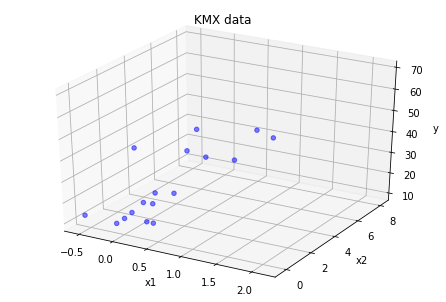

In [5]:
figure = plt.figure()
ax = Axes3D(figure)
ax.scatter(data['x1'], data['x2'], data['y'], c = 'blue', marker = 'o', alpha = 0.5)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')
ax.set_title('KMX data')
plt.show()

In [6]:
#mean = data.mean()
#std = data.std()
#normalized_data = (data - mean) / std
#normalized_data.head()

In [7]:
#normalized_data.describe()

In [8]:
feature_names = ['x1', 'x2']
data_x = data[feature_names]
data_y = data['y']
print('input shape: ', data_x.shape)
print('output_shape: ', data_y.shape)
data_x1 = data['x1']
data_x2 = data['x2']
print('number of samples: ', data_x1.shape)

#feature_names = ['x1', 'x2']
#data_x = normalized_data[feature_names]
#data_y = normalized_data['y']
#print('input shape: ', data_x.shape)
#print('output_shape: ', data_y.shape)
#data_x1 = normalized_data['x1']
#data_x2 = normalized_data['x2']
#print('number of samples: ', data_x1.shape)

input shape:  (17, 2)
output_shape:  (17,)
number of samples:  (17,)


In [9]:
# Reshape data.
data_x = np.array(data_x)
data_y = np.array(data_y)

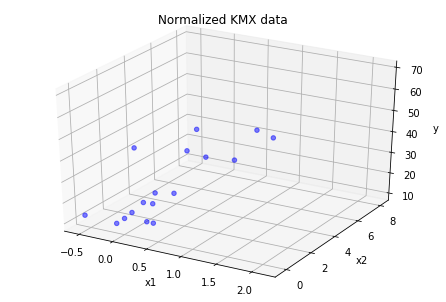

In [10]:
figure = plt.figure()
ax = Axes3D(figure)
ax.scatter(data_x1, data_x2, data_y, c = 'blue', marker = 'o', alpha = 0.5)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')
ax.set_title('Normalized KMX data')
plt.show()

In [11]:
# Model definition.
model = Sequential()
model.add(Dense(1, input_dim = 2, init = 'normal', activation = 'relu'))

# Compile model.
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse'])

C:\Users\Matt\Anaconda3\envs\gputest\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, input_dim=2, activation="relu", kernel_initializer="normal")`
  This is separate from the ipykernel package so we can avoid doing imports until


In [12]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [13]:
tensorboard = TensorBoard(log_dir = './keras_logs_smt_regression')

# Train model.
hist = model.fit(data_x, data_y, batch_size = 1, epochs = 2100, shuffle = False, callbacks = [tensorboard])




Epoch 1/2100
17/17 [==============================] - 0s 19ms/step - loss: 1469.6337 - mse: 1469.6338

Epoch 2/2100
17/17 [==============================] - 0s 2ms/step - loss: 1468.0605 - mse: 1468.0603
Epoch 3/2100
17/17 [==============================] - 0s 2ms/step - loss: 1466.6007 - mse: 1466.6006
Epoch 4/2100
17/17 [==============================] - 0s 2ms/step - loss: 1465.1209 - mse: 1465.1206
Epoch 5/2100
17/17 [==============================] - 0s 2ms/step - loss: 1463.6232 - mse: 1463.6232
Epoch 6/2100
17/17 [==============================] - 0s 2ms/step - loss: 1462.1137 - mse: 1462.1136
Epoch 7/2100
17/17 [==============================] - 0s 2ms/step - loss: 1460.5861 - mse: 1460.5862
Epoch 8/2100
17/17 [==============================] - 0s 2ms/step - loss: 1459.0444 - mse: 1459.0446
Epoch 9/2100
17/17 [==============================] - 0s 2ms/step - loss: 1457.4945 - mse: 1457.4944
Epoch 10/2100
17/17 [==============================] - 0s 2ms/step - loss: 1455.9417 -

17/17 [==============================] - 0s 3ms/step - loss: 1359.9696 - mse: 1359.9697
Epoch 74/2100
17/17 [==============================] - 0s 2ms/step - loss: 1358.4888 - mse: 1358.4889
Epoch 75/2100
17/17 [==============================] - 0s 2ms/step - loss: 1357.0093 - mse: 1357.0094
Epoch 76/2100
17/17 [==============================] - 0s 2ms/step - loss: 1355.5312 - mse: 1355.5311
Epoch 77/2100
17/17 [==============================] - 0s 2ms/step - loss: 1354.0545 - mse: 1354.0547
Epoch 78/2100
17/17 [==============================] - 0s 2ms/step - loss: 1352.5791 - mse: 1352.5792
Epoch 79/2100
17/17 [==============================] - 0s 3ms/step - loss: 1351.1051 - mse: 1351.1051
Epoch 80/2100
17/17 [==============================] - 0s 3ms/step - loss: 1349.6324 - mse: 1349.6326
Epoch 81/2100
17/17 [==============================] - 0s 2ms/step - loss: 1348.1611 - mse: 1348.1611
Epoch 82/2100
17/17 [==============================] - 0s 2ms/step - loss: 1346.6911 - mse: 1346

17/17 [==============================] - 0s 2ms/step - loss: 1247.0150 - mse: 1247.0149
Epoch 153/2100
17/17 [==============================] - 0s 2ms/step - loss: 1245.6354 - mse: 1245.6355
Epoch 154/2100
17/17 [==============================] - 0s 2ms/step - loss: 1244.2569 - mse: 1244.2568
Epoch 155/2100
17/17 [==============================] - 0s 2ms/step - loss: 1242.8796 - mse: 1242.8796
Epoch 156/2100
17/17 [==============================] - 0s 2ms/step - loss: 1241.5035 - mse: 1241.5035
Epoch 157/2100
17/17 [==============================] - 0s 2ms/step - loss: 1240.1287 - mse: 1240.1285
Epoch 158/2100
17/17 [==============================] - 0s 2ms/step - loss: 1238.7550 - mse: 1238.7551
Epoch 159/2100
17/17 [==============================] - 0s 2ms/step - loss: 1237.3825 - mse: 1237.3826
Epoch 160/2100
17/17 [==============================] - 0s 2ms/step - loss: 1236.0113 - mse: 1236.0112
Epoch 161/2100
17/17 [==============================] - 0s 2ms/step - loss: 1234.6411 - 

17/17 [==============================] - 0s 2ms/step - loss: 1141.5950 - mse: 1141.5950
Epoch 232/2100
17/17 [==============================] - 0s 2ms/step - loss: 1140.3054 - mse: 1140.3054
Epoch 233/2100
17/17 [==============================] - 0s 2ms/step - loss: 1139.0168 - mse: 1139.0170
Epoch 234/2100
17/17 [==============================] - 0s 2ms/step - loss: 1137.7295 - mse: 1137.7295
Epoch 235/2100
17/17 [==============================] - 0s 2ms/step - loss: 1136.4432 - mse: 1136.4432
Epoch 236/2100
17/17 [==============================] - 0s 2ms/step - loss: 1135.1579 - mse: 1135.1580
Epoch 237/2100
17/17 [==============================] - 0s 2ms/step - loss: 1133.8737 - mse: 1133.8738
Epoch 238/2100
17/17 [==============================] - 0s 2ms/step - loss: 1132.5908 - mse: 1132.5907
Epoch 239/2100
17/17 [==============================] - 0s 2ms/step - loss: 1131.3088 - mse: 1131.3086
Epoch 240/2100
17/17 [==============================] - 0s 2ms/step - loss: 1130.0279 - 

17/17 [==============================] - 0s 2ms/step - loss: 1042.9799 - mse: 1042.9797
Epoch 311/2100
17/17 [==============================] - 0s 2ms/step - loss: 1041.7728 - mse: 1041.7728
Epoch 312/2100
17/17 [==============================] - 0s 2ms/step - loss: 1040.5668 - mse: 1040.5669
Epoch 313/2100
17/17 [==============================] - 0s 3ms/step - loss: 1039.3619 - mse: 1039.3619
Epoch 314/2100
17/17 [==============================] - 0s 3ms/step - loss: 1038.1579 - mse: 1038.1578
Epoch 315/2100
17/17 [==============================] - 0s 2ms/step - loss: 1036.9550 - mse: 1036.9548
Epoch 316/2100
17/17 [==============================] - 0s 2ms/step - loss: 1035.7530 - mse: 1035.7529
Epoch 317/2100
17/17 [==============================] - 0s 2ms/step - loss: 1034.5520 - mse: 1034.5520
Epoch 318/2100
17/17 [==============================] - ETA: 0s - loss: 3420.2356 - mse: 3420.235 - 0s 2ms/step - loss: 1033.3520 - mse: 1033.3521
Epoch 319/2100
17/17 [======================

17/17 [==============================] - 0s 2ms/step - loss: 949.5367 - mse: 949.5366
Epoch 391/2100
17/17 [==============================] - 0s 2ms/step - loss: 948.4078 - mse: 948.4078
Epoch 392/2100
17/17 [==============================] - 0s 2ms/step - loss: 947.2799 - mse: 947.2799
Epoch 393/2100
17/17 [==============================] - 0s 2ms/step - loss: 946.1529 - mse: 946.1529
Epoch 394/2100
17/17 [==============================] - 0s 2ms/step - loss: 945.0268 - mse: 945.0268
Epoch 395/2100
17/17 [==============================] - 0s 2ms/step - loss: 943.9017 - mse: 943.9017
Epoch 396/2100
17/17 [==============================] - 0s 2ms/step - loss: 942.7775 - mse: 942.7774
Epoch 397/2100
17/17 [==============================] - 0s 2ms/step - loss: 941.6542 - mse: 941.6542
Epoch 398/2100
17/17 [==============================] - 0s 2ms/step - loss: 940.5319 - mse: 940.5319
Epoch 399/2100
17/17 [==============================] - 0s 2ms/step - loss: 939.4106 - mse: 939.4106
Epoch

17/17 [==============================] - 0s 2ms/step - loss: 862.1689 - mse: 862.1689
Epoch 471/2100
17/17 [==============================] - 0s 2ms/step - loss: 861.1140 - mse: 861.1138
Epoch 472/2100
17/17 [==============================] - 0s 2ms/step - loss: 860.0599 - mse: 860.0599
Epoch 473/2100
17/17 [==============================] - 0s 2ms/step - loss: 859.0068 - mse: 859.0067
Epoch 474/2100
17/17 [==============================] - 0s 2ms/step - loss: 857.9545 - mse: 857.9546
Epoch 475/2100
17/17 [==============================] - 0s 2ms/step - loss: 856.9033 - mse: 856.9034
Epoch 476/2100
17/17 [==============================] - 0s 2ms/step - loss: 855.8529 - mse: 855.8529
Epoch 477/2100
17/17 [==============================] - 0s 2ms/step - loss: 854.8033 - mse: 854.8032
Epoch 478/2100
17/17 [==============================] - 0s 2ms/step - loss: 853.7547 - mse: 853.7546
Epoch 479/2100
17/17 [==============================] - 0s 2ms/step - loss: 852.7069 - mse: 852.7069
Epoch

17/17 [==============================] - 0s 2ms/step - loss: 779.6097 - mse: 779.6097
Epoch 552/2100
17/17 [==============================] - 0s 2ms/step - loss: 778.6266 - mse: 778.6265
Epoch 553/2100
17/17 [==============================] - 0s 2ms/step - loss: 777.6444 - mse: 777.6444
Epoch 554/2100
17/17 [==============================] - 0s 2ms/step - loss: 776.6630 - mse: 776.6631
Epoch 555/2100
17/17 [==============================] - 0s 2ms/step - loss: 775.6825 - mse: 775.6825
Epoch 556/2100
17/17 [==============================] - 0s 2ms/step - loss: 774.7029 - mse: 774.7030
Epoch 557/2100
17/17 [==============================] - 0s 2ms/step - loss: 773.7242 - mse: 773.7242
Epoch 558/2100
17/17 [==============================] - 0s 2ms/step - loss: 772.7463 - mse: 772.7462
Epoch 559/2100
17/17 [==============================] - 0s 2ms/step - loss: 771.7693 - mse: 771.7693
Epoch 560/2100
17/17 [==============================] - 0s 2ms/step - loss: 770.7932 - mse: 770.7934
Epoch

17/17 [==============================] - 0s 2ms/step - loss: 702.7862 - mse: 702.7862
Epoch 633/2100
17/17 [==============================] - 0s 2ms/step - loss: 701.8729 - mse: 701.8729
Epoch 634/2100
17/17 [==============================] - 0s 2ms/step - loss: 700.9606 - mse: 700.9606
Epoch 635/2100
17/17 [==============================] - 0s 2ms/step - loss: 700.0490 - mse: 700.0490
Epoch 636/2100
17/17 [==============================] - 0s 2ms/step - loss: 699.1382 - mse: 699.1382
Epoch 637/2100
17/17 [==============================] - 0s 2ms/step - loss: 698.2284 - mse: 698.2285
Epoch 638/2100
17/17 [==============================] - 0s 2ms/step - loss: 697.3194 - mse: 697.3193
Epoch 639/2100
17/17 [==============================] - 0s 2ms/step - loss: 696.4113 - mse: 696.4114
Epoch 640/2100
17/17 [==============================] - 0s 2ms/step - loss: 695.5041 - mse: 695.5040
Epoch 641/2100
17/17 [==============================] - 0s 2ms/step - loss: 694.5977 - mse: 694.5977
Epoch

17/17 [==============================] - 0s 2ms/step - loss: 631.5575 - mse: 631.5575
Epoch 714/2100
17/17 [==============================] - 0s 2ms/step - loss: 630.7126 - mse: 630.7125
Epoch 715/2100
17/17 [==============================] - 0s 2ms/step - loss: 629.8685 - mse: 629.8687
Epoch 716/2100
17/17 [==============================] - 0s 2ms/step - loss: 629.0253 - mse: 629.0253
Epoch 717/2100
17/17 [==============================] - 0s 2ms/step - loss: 628.1830 - mse: 628.1831
Epoch 718/2100
17/17 [==============================] - 0s 2ms/step - loss: 627.3414 - mse: 627.3414
Epoch 719/2100
17/17 [==============================] - 0s 2ms/step - loss: 626.5007 - mse: 626.5006
Epoch 720/2100
17/17 [==============================] - 0s 2ms/step - loss: 625.6607 - mse: 625.6607
Epoch 721/2100
17/17 [==============================] - 0s 2ms/step - loss: 624.8217 - mse: 624.8217
Epoch 722/2100
17/17 [==============================] - 0s 2ms/step - loss: 623.9834 - mse: 623.9834
Epoch

17/17 [==============================] - 0s 2ms/step - loss: 565.8093 - mse: 565.8094
Epoch 795/2100
17/17 [==============================] - 0s 2ms/step - loss: 565.0314 - mse: 565.0314
Epoch 796/2100
17/17 [==============================] - 0s 2ms/step - loss: 564.2543 - mse: 564.2543
Epoch 797/2100
17/17 [==============================] - 0s 2ms/step - loss: 563.4781 - mse: 563.4780
Epoch 798/2100
17/17 [==============================] - 0s 3ms/step - loss: 562.7027 - mse: 562.7026
Epoch 799/2100
17/17 [==============================] - 0s 2ms/step - loss: 561.9281 - mse: 561.9282
Epoch 800/2100
17/17 [==============================] - 0s 2ms/step - loss: 561.1542 - mse: 561.1542
Epoch 801/2100
17/17 [==============================] - 0s 2ms/step - loss: 560.3812 - mse: 560.3812
Epoch 802/2100
17/17 [==============================] - 0s 2ms/step - loss: 559.6091 - mse: 559.6089
Epoch 803/2100
17/17 [==============================] - 0s 2ms/step - loss: 558.8377 - mse: 558.8376
Epoch

17/17 [==============================] - 0s 2ms/step - loss: 506.1459 - mse: 506.1460
Epoch 875/2100
17/17 [==============================] - 0s 2ms/step - loss: 505.4327 - mse: 505.4327
Epoch 876/2100
17/17 [==============================] - 0s 2ms/step - loss: 504.7204 - mse: 504.7204
Epoch 877/2100
17/17 [==============================] - 0s 2ms/step - loss: 504.0089 - mse: 504.0089
Epoch 878/2100
17/17 [==============================] - 0s 2ms/step - loss: 503.2982 - mse: 503.2982
Epoch 879/2100
17/17 [==============================] - 0s 2ms/step - loss: 502.5882 - mse: 502.5883
Epoch 880/2100
17/17 [==============================] - 0s 2ms/step - loss: 501.8791 - mse: 501.8790
Epoch 881/2100
17/17 [==============================] - 0s 2ms/step - loss: 501.1707 - mse: 501.1707
Epoch 882/2100
17/17 [==============================] - 0s 2ms/step - loss: 500.4633 - mse: 500.4632
Epoch 883/2100
17/17 [==============================] - 0s 2ms/step - loss: 499.7566 - mse: 499.7567
Epoch

17/17 [==============================] - 0s 2ms/step - loss: 450.9629 - mse: 450.9630
Epoch 956/2100
17/17 [==============================] - 0s 2ms/step - loss: 450.3140 - mse: 450.3140
Epoch 957/2100
17/17 [==============================] - 0s 2ms/step - loss: 449.6659 - mse: 449.6659
Epoch 958/2100
17/17 [==============================] - 0s 2ms/step - loss: 449.0186 - mse: 449.0186
Epoch 959/2100
17/17 [==============================] - 0s 2ms/step - loss: 448.3720 - mse: 448.3720
Epoch 960/2100
17/17 [==============================] - 0s 2ms/step - loss: 447.7261 - mse: 447.7261
Epoch 961/2100
17/17 [==============================] - 0s 2ms/step - loss: 447.0811 - mse: 447.0811
Epoch 962/2100
17/17 [==============================] - 0s 2ms/step - loss: 446.4369 - mse: 446.4369
Epoch 963/2100
17/17 [==============================] - 0s 2ms/step - loss: 445.7933 - mse: 445.7933
Epoch 964/2100
17/17 [==============================] - 0s 2ms/step - loss: 445.1506 - mse: 445.1506
Epoch

17/17 [==============================] - 0s 2ms/step - loss: 401.4978 - mse: 401.4978
Epoch 1036/2100
17/17 [==============================] - 0s 2ms/step - loss: 400.9106 - mse: 400.9105
Epoch 1037/2100
17/17 [==============================] - 0s 2ms/step - loss: 400.3241 - mse: 400.3241
Epoch 1038/2100
17/17 [==============================] - 0s 2ms/step - loss: 399.7384 - mse: 399.7384
Epoch 1039/2100
17/17 [==============================] - 0s 2ms/step - loss: 399.1534 - mse: 399.1535
Epoch 1040/2100
17/17 [==============================] - 0s 2ms/step - loss: 398.5692 - mse: 398.5692
Epoch 1041/2100
17/17 [==============================] - 0s 2ms/step - loss: 397.9858 - mse: 397.9858
Epoch 1042/2100
17/17 [==============================] - 0s 2ms/step - loss: 397.4031 - mse: 397.4031
Epoch 1043/2100
17/17 [==============================] - 0s 2ms/step - loss: 396.8213 - mse: 396.8213
Epoch 1044/2100
17/17 [==============================] - 0s 2ms/step - loss: 396.2401 - mse: 396.2

17/17 [==============================] - 0s 2ms/step - loss: 356.8983 - mse: 356.8983
Epoch 1116/2100
17/17 [==============================] - 0s 2ms/step - loss: 356.3709 - mse: 356.3709
Epoch 1117/2100
17/17 [==============================] - 0s 2ms/step - loss: 355.8442 - mse: 355.8443
Epoch 1118/2100
17/17 [==============================] - 0s 2ms/step - loss: 355.3183 - mse: 355.3183
Epoch 1119/2100
17/17 [==============================] - 0s 2ms/step - loss: 354.7931 - mse: 354.7932
Epoch 1120/2100
17/17 [==============================] - 0s 2ms/step - loss: 354.2687 - mse: 354.2687
Epoch 1121/2100
17/17 [==============================] - 0s 2ms/step - loss: 353.7449 - mse: 353.7450
Epoch 1122/2100
17/17 [==============================] - 0s 2ms/step - loss: 353.2219 - mse: 353.2219
Epoch 1123/2100
17/17 [==============================] - 0s 2ms/step - loss: 352.6997 - mse: 352.6997
Epoch 1124/2100
17/17 [==============================] - 0s 2ms/step - loss: 352.1782 - mse: 352.1

17/17 [==============================] - 0s 2ms/step - loss: 317.0046 - mse: 317.0046
Epoch 1196/2100
17/17 [==============================] - 0s 2ms/step - loss: 316.5350 - mse: 316.5350
Epoch 1197/2100
17/17 [==============================] - 0s 2ms/step - loss: 316.0660 - mse: 316.0661
Epoch 1198/2100
17/17 [==============================] - 0s 2ms/step - loss: 315.5978 - mse: 315.5978
Epoch 1199/2100
17/17 [==============================] - 0s 2ms/step - loss: 315.1302 - mse: 315.1302
Epoch 1200/2100
17/17 [==============================] - 0s 2ms/step - loss: 314.6634 - mse: 314.6634
Epoch 1201/2100
17/17 [==============================] - 0s 2ms/step - loss: 314.1973 - mse: 314.1973
Epoch 1202/2100
17/17 [==============================] - 0s 2ms/step - loss: 313.7318 - mse: 313.7318
Epoch 1203/2100
17/17 [==============================] - 0s 2ms/step - loss: 313.2670 - mse: 313.2670
Epoch 1204/2100
17/17 [==============================] - 0s 2ms/step - loss: 312.8030 - mse: 312.8

17/17 [==============================] - 0s 2ms/step - loss: 281.6337 - mse: 281.6337
Epoch 1276/2100
17/17 [==============================] - 0s 2ms/step - loss: 281.2193 - mse: 281.2194
Epoch 1277/2100
17/17 [==============================] - 0s 2ms/step - loss: 280.8056 - mse: 280.8056
Epoch 1278/2100
17/17 [==============================] - 0s 2ms/step - loss: 280.3927 - mse: 280.3927
Epoch 1279/2100
17/17 [==============================] - 0s 2ms/step - loss: 279.9803 - mse: 279.9803
Epoch 1280/2100
17/17 [==============================] - 0s 2ms/step - loss: 279.5686 - mse: 279.5686
Epoch 1281/2100
17/17 [==============================] - 0s 2ms/step - loss: 279.1577 - mse: 279.1577
Epoch 1282/2100
17/17 [==============================] - 0s 2ms/step - loss: 278.7474 - mse: 278.7474
Epoch 1283/2100
17/17 [==============================] - 0s 2ms/step - loss: 278.3377 - mse: 278.3377
Epoch 1284/2100
17/17 [==============================] - 0s 2ms/step - loss: 277.9287 - mse: 277.9

17/17 [==============================] - 0s 2ms/step - loss: 250.5765 - mse: 250.5765
Epoch 1356/2100
17/17 [==============================] - 0s 2ms/step - loss: 250.2146 - mse: 250.2146
Epoch 1357/2100
17/17 [==============================] - 0s 2ms/step - loss: 249.8533 - mse: 249.8533
Epoch 1358/2100
17/17 [==============================] - 0s 2ms/step - loss: 249.4927 - mse: 249.4926
Epoch 1359/2100
17/17 [==============================] - 0s 2ms/step - loss: 249.1326 - mse: 249.1326
Epoch 1360/2100
17/17 [==============================] - 0s 2ms/step - loss: 248.7733 - mse: 248.7733
Epoch 1361/2100
17/17 [==============================] - 0s 2ms/step - loss: 248.4146 - mse: 248.4146
Epoch 1362/2100
17/17 [==============================] - 0s 2ms/step - loss: 248.0566 - mse: 248.0565
Epoch 1363/2100
17/17 [==============================] - 0s 2ms/step - loss: 247.6991 - mse: 247.6991
Epoch 1364/2100
17/17 [==============================] - 0s 2ms/step - loss: 247.3423 - mse: 247.3

17/17 [==============================] - 0s 2ms/step - loss: 223.5947 - mse: 223.5947
Epoch 1436/2100
17/17 [==============================] - 0s 2ms/step - loss: 223.2822 - mse: 223.2822
Epoch 1437/2100
17/17 [==============================] - 0s 2ms/step - loss: 222.9701 - mse: 222.9701
Epoch 1438/2100
17/17 [==============================] - 0s 2ms/step - loss: 222.6587 - mse: 222.6587
Epoch 1439/2100
17/17 [==============================] - 0s 2ms/step - loss: 222.3479 - mse: 222.3479
Epoch 1440/2100
17/17 [==============================] - 0s 2ms/step - loss: 222.0378 - mse: 222.0378
Epoch 1441/2100
17/17 [==============================] - 0s 2ms/step - loss: 221.7282 - mse: 221.7282
Epoch 1442/2100
17/17 [==============================] - 0s 2ms/step - loss: 221.4193 - mse: 221.4193
Epoch 1443/2100
17/17 [==============================] - 0s 2ms/step - loss: 221.1108 - mse: 221.1108
Epoch 1444/2100
17/17 [==============================] - 0s 2ms/step - loss: 220.8030 - mse: 220.8

17/17 [==============================] - 0s 2ms/step - loss: 200.4222 - mse: 200.4222
Epoch 1516/2100
17/17 [==============================] - 0s 2ms/step - loss: 200.1554 - mse: 200.1554
Epoch 1517/2100
17/17 [==============================] - 0s 2ms/step - loss: 199.8892 - mse: 199.8892
Epoch 1518/2100
17/17 [==============================] - 0s 2ms/step - loss: 199.6235 - mse: 199.6235
Epoch 1519/2100
17/17 [==============================] - 0s 2ms/step - loss: 199.3584 - mse: 199.3584
Epoch 1520/2100
17/17 [==============================] - 0s 2ms/step - loss: 199.0938 - mse: 199.0938
Epoch 1521/2100
17/17 [==============================] - 0s 2ms/step - loss: 198.8297 - mse: 198.8297
Epoch 1522/2100
17/17 [==============================] - 0s 2ms/step - loss: 198.5662 - mse: 198.5662
Epoch 1523/2100
17/17 [==============================] - 0s 2ms/step - loss: 198.3033 - mse: 198.3033
Epoch 1524/2100
17/17 [==============================] - 0s 2ms/step - loss: 198.0409 - mse: 198.0

17/17 [==============================] - 0s 2ms/step - loss: 180.7635 - mse: 180.7635
Epoch 1596/2100
17/17 [==============================] - 0s 2ms/step - loss: 180.5387 - mse: 180.5387
Epoch 1597/2100
17/17 [==============================] - 0s 2ms/step - loss: 180.3144 - mse: 180.3144
Epoch 1598/2100
17/17 [==============================] - 0s 2ms/step - loss: 180.0905 - mse: 180.0906
Epoch 1599/2100
17/17 [==============================] - 0s 2ms/step - loss: 179.8672 - mse: 179.8672
Epoch 1600/2100
17/17 [==============================] - 0s 2ms/step - loss: 179.6444 - mse: 179.6444
Epoch 1601/2100
17/17 [==============================] - 0s 2ms/step - loss: 179.4220 - mse: 179.4220
Epoch 1602/2100
17/17 [==============================] - 0s 2ms/step - loss: 179.2002 - mse: 179.2002
Epoch 1603/2100
17/17 [==============================] - 0s 3ms/step - loss: 178.9788 - mse: 178.9788
Epoch 1604/2100
17/17 [==============================] - 0s 3ms/step - loss: 178.7579 - mse: 178.7

17/17 [==============================] - 0s 2ms/step - loss: 164.2998 - mse: 164.2998
Epoch 1676/2100
17/17 [==============================] - 0s 2ms/step - loss: 164.1128 - mse: 164.1128
Epoch 1677/2100
17/17 [==============================] - 0s 2ms/step - loss: 163.9262 - mse: 163.9262
Epoch 1678/2100
17/17 [==============================] - 0s 2ms/step - loss: 163.7401 - mse: 163.7401
Epoch 1679/2100
17/17 [==============================] - 0s 2ms/step - loss: 163.5544 - mse: 163.5544
Epoch 1680/2100
17/17 [==============================] - 0s 2ms/step - loss: 163.3693 - mse: 163.3693
Epoch 1681/2100
17/17 [==============================] - 0s 2ms/step - loss: 163.1845 - mse: 163.1844
Epoch 1682/2100
17/17 [==============================] - 0s 2ms/step - loss: 163.0001 - mse: 163.0001
Epoch 1683/2100
17/17 [==============================] - 0s 2ms/step - loss: 162.8162 - mse: 162.8163
Epoch 1684/2100
17/17 [==============================] - 0s 2ms/step - loss: 162.6327 - mse: 162.6

17/17 [==============================] - 0s 2ms/step - loss: 150.6922 - mse: 150.6922
Epoch 1756/2100
17/17 [==============================] - 0s 2ms/step - loss: 150.5387 - mse: 150.5387
Epoch 1757/2100
17/17 [==============================] - 0s 2ms/step - loss: 150.3856 - mse: 150.3856
Epoch 1758/2100
17/17 [==============================] - 0s 2ms/step - loss: 150.2330 - mse: 150.2330
Epoch 1759/2100
17/17 [==============================] - 0s 2ms/step - loss: 150.0806 - mse: 150.0806
Epoch 1760/2100
17/17 [==============================] - 0s 2ms/step - loss: 149.9287 - mse: 149.9288
Epoch 1761/2100
17/17 [==============================] - 0s 2ms/step - loss: 149.7772 - mse: 149.7772
Epoch 1762/2100
17/17 [==============================] - 0s 2ms/step - loss: 149.6261 - mse: 149.6261
Epoch 1763/2100
17/17 [==============================] - 0s 2ms/step - loss: 149.4753 - mse: 149.4753
Epoch 1764/2100
17/17 [==============================] - 0s 2ms/step - loss: 149.3249 - mse: 149.3

17/17 [==============================] - 0s 2ms/step - loss: 139.5951 - mse: 139.5951
Epoch 1836/2100
17/17 [==============================] - 0s 3ms/step - loss: 139.4708 - mse: 139.4708
Epoch 1837/2100
17/17 [==============================] - 0s 2ms/step - loss: 139.3469 - mse: 139.3469
Epoch 1838/2100
17/17 [==============================] - 0s 2ms/step - loss: 139.2232 - mse: 139.2233
Epoch 1839/2100
17/17 [==============================] - 0s 2ms/step - loss: 139.0999 - mse: 139.0999
Epoch 1840/2100
17/17 [==============================] - 0s 2ms/step - loss: 138.9770 - mse: 138.9770
Epoch 1841/2100
17/17 [==============================] - 0s 2ms/step - loss: 138.8544 - mse: 138.8544
Epoch 1842/2100
17/17 [==============================] - 0s 2ms/step - loss: 138.7321 - mse: 138.7320
Epoch 1843/2100
17/17 [==============================] - 0s 2ms/step - loss: 138.6100 - mse: 138.6100
Epoch 1844/2100
17/17 [==============================] - 0s 2ms/step - loss: 138.4884 - mse: 138.4

17/17 [==============================] - 0s 2ms/step - loss: 130.6630 - mse: 130.6630
Epoch 1916/2100
17/17 [==============================] - 0s 2ms/step - loss: 130.5636 - mse: 130.5636
Epoch 1917/2100
17/17 [==============================] - 0s 2ms/step - loss: 130.4645 - mse: 130.4645
Epoch 1918/2100
17/17 [==============================] - 0s 2ms/step - loss: 130.3657 - mse: 130.3657
Epoch 1919/2100
17/17 [==============================] - 0s 2ms/step - loss: 130.2672 - mse: 130.2672
Epoch 1920/2100
17/17 [==============================] - 0s 2ms/step - loss: 130.1689 - mse: 130.1689
Epoch 1921/2100
17/17 [==============================] - 0s 2ms/step - loss: 130.0710 - mse: 130.0710
Epoch 1922/2100
17/17 [==============================] - 0s 2ms/step - loss: 129.9734 - mse: 129.9734
Epoch 1923/2100
17/17 [==============================] - 0s 2ms/step - loss: 129.8759 - mse: 129.8759
Epoch 1924/2100
17/17 [==============================] - 0s 2ms/step - loss: 129.7788 - mse: 129.7

17/17 [==============================] - 0s 2ms/step - loss: 123.5637 - mse: 123.5637
Epoch 1996/2100
17/17 [==============================] - 0s 2ms/step - loss: 123.4852 - mse: 123.4852
Epoch 1997/2100
17/17 [==============================] - 0s 2ms/step - loss: 123.4069 - mse: 123.4069
Epoch 1998/2100
17/17 [==============================] - 0s 2ms/step - loss: 123.3289 - mse: 123.3289
Epoch 1999/2100
17/17 [==============================] - 0s 2ms/step - loss: 123.2512 - mse: 123.2512
Epoch 2000/2100
17/17 [==============================] - 0s 2ms/step - loss: 123.1736 - mse: 123.1736
Epoch 2001/2100
17/17 [==============================] - 0s 2ms/step - loss: 123.0963 - mse: 123.0963
Epoch 2002/2100
17/17 [==============================] - 0s 2ms/step - loss: 123.0192 - mse: 123.0192
Epoch 2003/2100
17/17 [==============================] - 0s 2ms/step - loss: 122.9424 - mse: 122.9424
Epoch 2004/2100
17/17 [==============================] - 0s 2ms/step - loss: 122.8658 - mse: 122.8

17/17 [==============================] - 0s 3ms/step - loss: 117.9875 - mse: 117.9875
Epoch 2076/2100
17/17 [==============================] - 0s 3ms/step - loss: 117.9262 - mse: 117.9262
Epoch 2077/2100
17/17 [==============================] - 0s 3ms/step - loss: 117.8652 - mse: 117.8652
Epoch 2078/2100
17/17 [==============================] - 0s 2ms/step - loss: 117.8042 - mse: 117.8042
Epoch 2079/2100
17/17 [==============================] - 0s 2ms/step - loss: 117.7436 - mse: 117.7436
Epoch 2080/2100
17/17 [==============================] - 0s 2ms/step - loss: 117.6830 - mse: 117.6830
Epoch 2081/2100
17/17 [==============================] - 0s 2ms/step - loss: 117.6227 - mse: 117.6227
Epoch 2082/2100
17/17 [==============================] - 0s 2ms/step - loss: 117.5626 - mse: 117.5626
Epoch 2083/2100
17/17 [==============================] - 0s 2ms/step - loss: 117.5026 - mse: 117.5026
Epoch 2084/2100
17/17 [==============================] - 0s 2ms/step - loss: 117.4429 - mse: 117.4

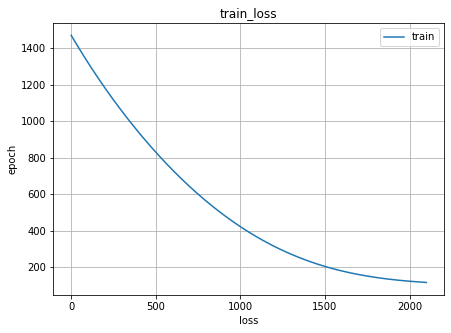

In [14]:
# Graphically display loss and accuracy
num_epochs = 2100
train_loss = hist.history['loss']
xc = range(num_epochs)

plt.figure(1, figsize = (7, 5))
plt.plot(xc, train_loss)
plt.xlabel('loss')
plt.ylabel('epoch')
plt.title('train_loss')
plt.grid(True)
plt.legend(['train', 'val'])
plt.style.use(['classic'])

In [15]:
x_test = np.array(data_x[0:20])
y_test = np.array(data_y[0:20])
score = model.evaluate(x_test, y_test)
print('Test loss: ', score[0])

17/17 [==============================] - 0s 880us/step
Test loss:  116.44084167480469


In [16]:
x_test = np.array(data_x[0:5])
y_test = np.array(data_y[0:5])
y_test_predicted = model.predict(x_test)
print('Predicted value:\n', y_test_predicted)
print('Actual value:\n', y_test)

Predicted value:
 [[56.27916 ]
 [59.64904 ]
 [50.361897]
 [41.55989 ]
 [25.217442]]
Actual value:
 [68.62055777 65.84824701 52.88690476 64.01115079 49.75063492]


In [17]:
x_test = np.array(data_x)
y_test = np.array(data_y)
y_test_predicted = model.predict(x_test)

In [18]:
# Obtain trained weights.
params = model.layers[0].get_weights()
w = params[0]
b = params[1]
print('Weights: ', w)
print('bias: ', b)

Weights:  [[18.058638  ]
 [-0.22788842]]
bias:  [21.112951]


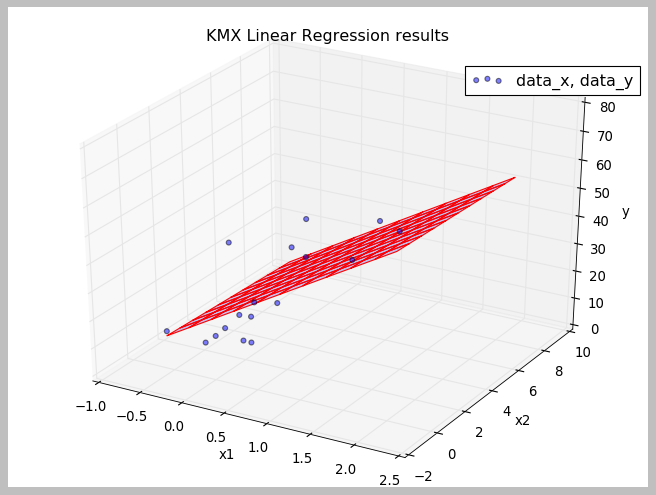

In [20]:
# Plot trained model.
x1_surface, x2_surface = np.meshgrid(np.linspace(data_x1.min(),data_x1.max(),100), np.linspace(data_x2.min(),data_x2.max(),100))
y_predicted_surface = x1_surface * w[0] + x2_surface * w[1] + b
figure = plt.figure()
ax = Axes3D(figure)
sct = ax.scatter(data_x1, data_x2, data_y, c = 'blue', marker = 'o', alpha = 0.5)
plt_surface = ax.plot_surface(x1_surface, x2_surface, y_predicted_surface, edgecolors='r', alpha = .2)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')
ax.set_title('KMX Linear Regression results')
plt.legend(['data_x, data_y'], bbox_to_anchor = (1, 0.8), loc = 4)
plt.show()

In [21]:
# Save trained model.
model.save('smt-regression-model.h5')

In [22]:
from tensorflow.keras.models import load_model
smt_model = load_model('smt-regression-model.h5')
smt_model.get_weights()
weights = smt_model.get_weights()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [23]:
print('P/E value: ', weights[0][0])
print('g coefficient: ', weights[0][1])
print('bias: ', weights[1][0])

P/E value:  [18.058638]
g coefficient:  [-0.22788842]
bias:  21.112951


In [24]:
data = model_data_service.get_ticker_df('GOOGL')
data_x_GOOGL = data[feature_names]
data_x_GOOGL = np.array(data_x_GOOGL)

data_y_GOOGL = data['y']
data_y_GOOGL = np.array(data_y_GOOGL)

y_GOOGL_predicted = model.predict(data_x_GOOGL)


data_x1_GOOGL = data['x1']
data_x2_GOOGL = data['x2']

#print('Predicted value:\n', y_GOOGL_predicted)
#print('Actual value:\n', data_y_GOOGL)

## Display df of computed vs actual
#print('GOOGL Model results')
#data1 = [{'year': 2013, 'value in 5 years': y_GOOGL_predicted[0][0]},
#        {'year': 2012, 'value in 5 years': y_GOOGL_predicted[1][0]},
#        {'year': 2011, 'value in 5 years': y_GOOGL_predicted[2][0]},
#        {'year': 2010, 'value in 5 years': y_GOOGL_predicted[3][0]},
#        {'year': 2009, 'value in 5 years': y_GOOGL_predicted[4][0]},
#        {'year': 2008, 'value in 5 years': y_GOOGL_predicted[5][0]},
#        {'year': 2007, 'value in 5 years': y_GOOGL_predicted[6][0]},
#        {'year': 2006, 'value in 5 years': y_GOOGL_predicted[7][0]},
#        {'year': 2005, 'value in 5 years': y_GOOGL_predicted[8][0]},
#        {'year': 2004, 'value in 5 years': y_GOOGL_predicted[9][0]},
#        {'year': 2003, 'value in 5 years': y_GOOGL_predicted[10][0]},
#        {'year': 2002, 'value in 5 years': y_GOOGL_predicted[11][0]},
#        {'year': 2001, 'value in 5 years': y_GOOGL_predicted[12][0]},
#        {'year': 2000, 'value in 5 years': y_GOOGL_predicted[13][0]},
#        {'year': 1999, 'value in 5 years': y_GOOGL_predicted[14][0]}
#       ] 
#df = pd.DataFrame(data1) 
#df
#
#print('GOOGL Actual results')
#data2 = [{'year': 2013, 'value in 5 years': data_y_GOOGL[0]},
#        {'year': 2012, 'value in 5 years': data_y_GOOGL[1]},
#        {'year': 2011, 'value in 5 years': data_y_GOOGL[2]},
#        {'year': 2010, 'value in 5 years': data_y_GOOGL[3]},
#        {'year': 2009, 'value in 5 years': data_y_GOOGL[4]},
#        {'year': 2008, 'value in 5 years': data_y_GOOGL[5]},
#        {'year': 2007, 'value in 5 years': data_y_GOOGL[6]},
#        {'year': 2006, 'value in 5 years': data_y_GOOGL[7]},
#        {'year': 2005, 'value in 5 years': data_y_GOOGL[8]},
#        {'year': 2004, 'value in 5 years': data_y_GOOGL[9]},
#        {'year': 2003, 'value in 5 years': data_y_GOOGL[10]},
#        {'year': 2002, 'value in 5 years': data_y_GOOGL[11]},
#        {'year': 2001, 'value in 5 years': data_y_GOOGL[12]},
#        {'year': 2000, 'value in 5 years': data_y_GOOGL[13]},
#        {'year': 1999, 'value in 5 years': data_y_GOOGL[14]}
#       ] 
#df2 = pd.DataFrame(data2) 
#df2

    year         x1        x2            y
0   2013  19.499853 -0.266631  1122.043586
1   2012  19.211755 -2.694472   939.773068
2   2011  14.515748 -1.147126   763.213214
3   2010  11.717371 -1.357095   619.988214
4   2009   8.554293 -1.917314   568.122365
5   2008   5.423551 -1.886692   442.563932
6   2007   5.288783 -0.007260   321.729964
7   2006   3.969479 -1.000974   284.771854
8   2005   2.103891 -1.041411   268.079628
9   2004   0.571745 -0.405124   220.064225
10  2003   0.159446 -0.114586   232.658667
11  2002   0.154782  0.015047   269.644863
12  2001   0.011588 -0.010629   205.798449
13  2000  -0.063023  0.432337   139.018562
14  1999  -0.044798  0.015536    75.976614


In [25]:
# Train further against GOOGL data
hist = model.fit(data_x_GOOGL, data_y_GOOGL, batch_size = 1, epochs = 2100, shuffle = False, callbacks = [tensorboard])

Epoch 1/2100
15/15 [==============================] - 0s 3ms/step - loss: 122468.8298 - mse: 122468.8281
Epoch 2/2100
15/15 [==============================] - 0s 2ms/step - loss: 122074.6118 - mse: 122074.5938
Epoch 3/2100
15/15 [==============================] - 0s 3ms/step - loss: 121728.4181 - mse: 121728.4141
Epoch 4/2100
15/15 [==============================] - 0s 2ms/step - loss: 121433.4274 - mse: 121433.4297
Epoch 5/2100
15/15 [==============================] - 0s 2ms/step - loss: 121175.0031 - mse: 121175.0000
Epoch 6/2100
15/15 [==============================] - 0s 2ms/step - loss: 120942.6643 - mse: 120942.6797
Epoch 7/2100
15/15 [==============================] - 0s 2ms/step - loss: 120729.7816 - mse: 120729.7656
Epoch 8/2100
15/15 [==============================] - 0s 2ms/step - loss: 120532.0653 - mse: 120532.0781
Epoch 9/2100
15/15 [==============================] - 0s 2ms/step - loss: 120346.5274 - mse: 120346.5234
Epoch 10/2100
15/15 [==============================] - 

15/15 [==============================] - 0s 2ms/step - loss: 113609.6971 - mse: 113609.6797
Epoch 79/2100
15/15 [==============================] - 0s 2ms/step - loss: 113537.2522 - mse: 113537.2578
Epoch 80/2100
15/15 [==============================] - 0s 2ms/step - loss: 113465.0765 - mse: 113465.0859
Epoch 81/2100
15/15 [==============================] - 0s 2ms/step - loss: 113393.1772 - mse: 113393.1719
Epoch 82/2100
15/15 [==============================] - 0s 2ms/step - loss: 113321.5393 - mse: 113321.5391
Epoch 83/2100
15/15 [==============================] - 0s 2ms/step - loss: 113250.1746 - mse: 113250.1797
Epoch 84/2100
15/15 [==============================] - 0s 2ms/step - loss: 113179.0203 - mse: 113179.0156
Epoch 85/2100
15/15 [==============================] - 0s 2ms/step - loss: 113108.1367 - mse: 113108.1172
Epoch 86/2100
15/15 [==============================] - 0s 2ms/step - loss: 113037.4633 - mse: 113037.4766
Epoch 87/2100
15/15 [==============================] - 0s 2m

15/15 [==============================] - 0s 2ms/step - loss: 108600.1915 - mse: 108600.2031
Epoch 155/2100
15/15 [==============================] - 0s 2ms/step - loss: 108538.5893 - mse: 108538.6094
Epoch 156/2100
15/15 [==============================] - 0s 2ms/step - loss: 108477.0240 - mse: 108477.0156
Epoch 157/2100
15/15 [==============================] - 0s 2ms/step - loss: 108415.5215 - mse: 108415.5156
Epoch 158/2100
15/15 [==============================] - 0s 2ms/step - loss: 108354.1274 - mse: 108354.1172
Epoch 159/2100
15/15 [==============================] - 0s 2ms/step - loss: 108292.8006 - mse: 108292.7969
Epoch 160/2100
15/15 [==============================] - 0s 2ms/step - loss: 108231.5099 - mse: 108231.5078
Epoch 161/2100
15/15 [==============================] - 0s 2ms/step - loss: 108170.2939 - mse: 108170.3047
Epoch 162/2100
15/15 [==============================] - 0s 2ms/step - loss: 108109.1420 - mse: 108109.1406
Epoch 163/2100
15/15 [==============================

15/15 [==============================] - 0s 2ms/step - loss: 104072.7632 - mse: 104072.7734
Epoch 231/2100
15/15 [==============================] - 0s 2ms/step - loss: 104014.7952 - mse: 104014.7891
Epoch 232/2100
15/15 [==============================] - 0s 2ms/step - loss: 103956.8591 - mse: 103956.8516
Epoch 233/2100
15/15 [==============================] - 0s 2ms/step - loss: 103898.9696 - mse: 103898.9844
Epoch 234/2100
15/15 [==============================] - 0s 2ms/step - loss: 103841.1154 - mse: 103841.1172
Epoch 235/2100
15/15 [==============================] - 0s 2ms/step - loss: 103783.3061 - mse: 103783.2891
Epoch 236/2100
15/15 [==============================] - 0s 2ms/step - loss: 103725.5296 - mse: 103725.5234
Epoch 237/2100
15/15 [==============================] - 0s 2ms/step - loss: 103667.7905 - mse: 103667.7891
Epoch 238/2100
15/15 [==============================] - 0s 2ms/step - loss: 103610.0812 - mse: 103610.0781
Epoch 239/2100
15/15 [==============================

15/15 [==============================] - 0s 2ms/step - loss: 99749.5153 - mse: 99749.5156
Epoch 307/2100
15/15 [==============================] - 0s 2ms/step - loss: 99693.5878 - mse: 99693.5859
Epoch 308/2100
15/15 [==============================] - 0s 2ms/step - loss: 99637.6842 - mse: 99637.6797
Epoch 309/2100
15/15 [==============================] - 0s 2ms/step - loss: 99581.7901 - mse: 99581.7969
Epoch 310/2100
15/15 [==============================] - 0s 2ms/step - loss: 99525.9150 - mse: 99525.9062
Epoch 311/2100
15/15 [==============================] - 0s 2ms/step - loss: 99470.0731 - mse: 99470.0547
Epoch 312/2100
15/15 [==============================] - 0s 2ms/step - loss: 99414.2458 - mse: 99414.2422
Epoch 313/2100
15/15 [==============================] - 0s 2ms/step - loss: 99358.4359 - mse: 99358.4453
Epoch 314/2100
15/15 [==============================] - 0s 2ms/step - loss: 99302.6479 - mse: 99302.6484
Epoch 315/2100
15/15 [==============================] - ETA: 0s - loss

15/15 [==============================] - 0s 2ms/step - loss: 95504.2028 - mse: 95504.2031
Epoch 384/2100
15/15 [==============================] - 0s 2ms/step - loss: 95449.8331 - mse: 95449.8281
Epoch 385/2100
15/15 [==============================] - 0s 2ms/step - loss: 95395.4820 - mse: 95395.4688
Epoch 386/2100
15/15 [==============================] - 0s 2ms/step - loss: 95341.1499 - mse: 95341.1484
Epoch 387/2100
15/15 [==============================] - 0s 2ms/step - loss: 95286.8267 - mse: 95286.8203
Epoch 388/2100
15/15 [==============================] - 0s 2ms/step - loss: 95232.5325 - mse: 95232.5312
Epoch 389/2100
15/15 [==============================] - 0s 2ms/step - loss: 95178.2426 - mse: 95178.2344
Epoch 390/2100
15/15 [==============================] - 0s 2ms/step - loss: 95123.9946 - mse: 95124.0078
Epoch 391/2100
15/15 [==============================] - 0s 2ms/step - loss: 95069.7576 - mse: 95069.7578
Epoch 392/2100
15/15 [==============================] - 0s 2ms/step - 

15/15 [==============================] - 0s 2ms/step - loss: 91318.8341 - mse: 91318.8359
Epoch 462/2100
15/15 [==============================] - 0s 2ms/step - loss: 91265.8818 - mse: 91265.8828
Epoch 463/2100
15/15 [==============================] - 0s 2ms/step - loss: 91212.9365 - mse: 91212.9453
Epoch 464/2100
15/15 [==============================] - 0s 2ms/step - loss: 91160.0257 - mse: 91160.0234
Epoch 465/2100
15/15 [==============================] - 0s 2ms/step - loss: 91107.1238 - mse: 91107.1172
Epoch 466/2100
15/15 [==============================] - 0s 2ms/step - loss: 91054.2270 - mse: 91054.2266
Epoch 467/2100
15/15 [==============================] - 0s 3ms/step - loss: 91001.3570 - mse: 91001.3672
Epoch 468/2100
15/15 [==============================] - 0s 3ms/step - loss: 90948.5241 - mse: 90948.5234
Epoch 469/2100
15/15 [==============================] - 0s 2ms/step - loss: 90895.7048 - mse: 90895.7109
Epoch 470/2100
15/15 [==============================] - 0s 2ms/step - 

15/15 [==============================] - 0s 2ms/step - loss: 87244.6363 - mse: 87244.6328
Epoch 540/2100
15/15 [==============================] - 0s 2ms/step - loss: 87193.0895 - mse: 87193.1016
Epoch 541/2100
15/15 [==============================] - 0s 2ms/step - loss: 87141.5564 - mse: 87141.5391
Epoch 542/2100
15/15 [==============================] - 0s 2ms/step - loss: 87090.0532 - mse: 87090.0469
Epoch 543/2100
15/15 [==============================] - 0s 2ms/step - loss: 87038.5679 - mse: 87038.5859
Epoch 544/2100
15/15 [==============================] - 0s 2ms/step - loss: 86987.1016 - mse: 86987.1016
Epoch 545/2100
15/15 [==============================] - 0s 2ms/step - loss: 86935.6529 - mse: 86935.6562
Epoch 546/2100
15/15 [==============================] - 0s 2ms/step - loss: 86884.2212 - mse: 86884.2188
Epoch 547/2100
15/15 [==============================] - 0s 2ms/step - loss: 86832.8060 - mse: 86832.8203
Epoch 548/2100
15/15 [==============================] - 0s 2ms/step - 

15/15 [==============================] - 0s 2ms/step - loss: 83327.0715 - mse: 83327.0703
Epoch 617/2100
15/15 [==============================] - 0s 2ms/step - loss: 83276.8604 - mse: 83276.8516
Epoch 618/2100
15/15 [==============================] - 0s 2ms/step - loss: 83226.6728 - mse: 83226.6797
Epoch 619/2100
15/15 [==============================] - 0s 2ms/step - loss: 83176.5097 - mse: 83176.5156
Epoch 620/2100
15/15 [==============================] - 0s 2ms/step - loss: 83126.3606 - mse: 83126.3672
Epoch 621/2100
15/15 [==============================] - 0s 2ms/step - loss: 83076.2300 - mse: 83076.2266
Epoch 622/2100
15/15 [==============================] - 0s 2ms/step - loss: 83026.1086 - mse: 83026.0938
Epoch 623/2100
15/15 [==============================] - 0s 2ms/step - loss: 82976.0152 - mse: 82976.0156
Epoch 624/2100
15/15 [==============================] - 0s 2ms/step - loss: 82925.9401 - mse: 82925.9453
Epoch 625/2100
15/15 [==============================] - 0s 2ms/step - 

15/15 [==============================] - 0s 2ms/step - loss: 79464.4604 - mse: 79464.4609
Epoch 695/2100
15/15 [==============================] - 0s 3ms/step - loss: 79415.6454 - mse: 79415.6484
Epoch 696/2100
15/15 [==============================] - 0s 2ms/step - loss: 79366.8433 - mse: 79366.8516
Epoch 697/2100
15/15 [==============================] - 0s 2ms/step - loss: 79318.0564 - mse: 79318.0547
Epoch 698/2100
15/15 [==============================] - 0s 2ms/step - loss: 79269.2808 - mse: 79269.2734
Epoch 699/2100
15/15 [==============================] - 0s 2ms/step - loss: 79220.5251 - mse: 79220.5391
Epoch 700/2100
15/15 [==============================] - 0s 2ms/step - loss: 79171.7901 - mse: 79171.7812
Epoch 701/2100
15/15 [==============================] - 0s 2ms/step - loss: 79123.0681 - mse: 79123.0547
Epoch 702/2100
15/15 [==============================] - 0s 2ms/step - loss: 79074.3711 - mse: 79074.3672
Epoch 703/2100
15/15 [==============================] - 0s 2ms/step - 

15/15 [==============================] - 0s 2ms/step - loss: 75707.6818 - mse: 75707.6719
Epoch 773/2100
15/15 [==============================] - 0s 2ms/step - loss: 75660.2143 - mse: 75660.2188
Epoch 774/2100
15/15 [==============================] - 0s 2ms/step - loss: 75612.7636 - mse: 75612.7656
Epoch 775/2100
15/15 [==============================] - 0s 2ms/step - loss: 75565.3333 - mse: 75565.3359
Epoch 776/2100
15/15 [==============================] - 0s 2ms/step - loss: 75517.9168 - mse: 75517.9062
Epoch 777/2100
15/15 [==============================] - 0s 2ms/step - loss: 75470.5288 - mse: 75470.5234
Epoch 778/2100
15/15 [==============================] - 0s 2ms/step - loss: 75423.1407 - mse: 75423.1484
Epoch 779/2100
15/15 [==============================] - 0s 2ms/step - loss: 75375.7796 - mse: 75375.7734
Epoch 780/2100
15/15 [==============================] - 0s 2ms/step - loss: 75328.4349 - mse: 75328.4219
Epoch 781/2100
15/15 [==============================] - 0s 2ms/step - 

15/15 [==============================] - 0s 2ms/step - loss: 72058.3360 - mse: 72058.3359
Epoch 851/2100
15/15 [==============================] - 0s 2ms/step - loss: 72012.2290 - mse: 72012.2266
Epoch 852/2100
15/15 [==============================] - 0s 2ms/step - loss: 71966.1471 - mse: 71966.1484
Epoch 853/2100
15/15 [==============================] - 0s 3ms/step - loss: 71920.0783 - mse: 71920.0859
Epoch 854/2100
15/15 [==============================] - 0s 3ms/step - loss: 71874.0314 - mse: 71874.0234
Epoch 855/2100
15/15 [==============================] - 0s 3ms/step - loss: 71828.0037 - mse: 71828.0078
Epoch 856/2100
15/15 [==============================] - 0s 2ms/step - loss: 71781.9977 - mse: 71781.9922
Epoch 857/2100
15/15 [==============================] - 0s 2ms/step - loss: 71736.0051 - mse: 71736.0078
Epoch 858/2100
15/15 [==============================] - 0s 2ms/step - loss: 71690.0288 - mse: 71690.0312
Epoch 859/2100
15/15 [==============================] - 0s 2ms/step - 

15/15 [==============================] - 0s 2ms/step - loss: 68559.7738 - mse: 68559.7734
Epoch 928/2100
15/15 [==============================] - 0s 2ms/step - loss: 68515.0239 - mse: 68515.0312
Epoch 929/2100
15/15 [==============================] - 0s 2ms/step - loss: 68470.3053 - mse: 68470.3047
Epoch 930/2100
15/15 [==============================] - 0s 2ms/step - loss: 68425.6062 - mse: 68425.6016
Epoch 931/2100
15/15 [==============================] - 0s 2ms/step - loss: 68380.9138 - mse: 68380.9141
Epoch 932/2100
15/15 [==============================] - 0s 2ms/step - loss: 68336.2526 - mse: 68336.2422
Epoch 933/2100
15/15 [==============================] - 0s 2ms/step - loss: 68291.6045 - mse: 68291.6016
Epoch 934/2100
15/15 [==============================] - 0s 2ms/step - loss: 68246.9800 - mse: 68246.9766
Epoch 935/2100
15/15 [==============================] - 0s 2ms/step - loss: 68202.3754 - mse: 68202.3750
Epoch 936/2100
15/15 [==============================] - 0s 2ms/step - 

15/15 [==============================] - 0s 2ms/step - loss: 65122.3924 - mse: 65122.3906
Epoch 1006/2100
15/15 [==============================] - 0s 2ms/step - loss: 65078.9985 - mse: 65079.0000
Epoch 1007/2100
15/15 [==============================] - 0s 2ms/step - loss: 65035.6334 - mse: 65035.6328
Epoch 1008/2100
15/15 [==============================] - 0s 2ms/step - loss: 64992.2950 - mse: 64992.2930
Epoch 1009/2100
15/15 [==============================] - 0s 2ms/step - loss: 64948.9705 - mse: 64948.9648
Epoch 1010/2100
15/15 [==============================] - 0s 2ms/step - loss: 64905.6716 - mse: 64905.6719
Epoch 1011/2100
15/15 [==============================] - 0s 2ms/step - loss: 64862.3890 - mse: 64862.3906
Epoch 1012/2100
15/15 [==============================] - 0s 2ms/step - loss: 64819.1116 - mse: 64819.1094
Epoch 1013/2100
15/15 [==============================] - 0s 2ms/step - loss: 64775.8649 - mse: 64775.8672
Epoch 1014/2100
15/15 [==============================] - 0s 2m

15/15 [==============================] - 0s 3ms/step - loss: 61832.8266 - mse: 61832.8281
Epoch 1083/2100
15/15 [==============================] - 0s 3ms/step - loss: 61790.8006 - mse: 61790.8008
Epoch 1084/2100
15/15 [==============================] - 0s 3ms/step - loss: 61748.7849 - mse: 61748.7852
Epoch 1085/2100
15/15 [==============================] - 0s 2ms/step - loss: 61706.7879 - mse: 61706.7891
Epoch 1086/2100
15/15 [==============================] - 0s 2ms/step - loss: 61664.8025 - mse: 61664.8047
Epoch 1087/2100
15/15 [==============================] - 0s 2ms/step - loss: 61622.8396 - mse: 61622.8359
Epoch 1088/2100
15/15 [==============================] - 0s 2ms/step - loss: 61580.8874 - mse: 61580.8750
Epoch 1089/2100
15/15 [==============================] - 0s 2ms/step - loss: 61538.9593 - mse: 61538.9609
Epoch 1090/2100
15/15 [==============================] - 0s 2ms/step - loss: 61497.0558 - mse: 61497.0625
Epoch 1091/2100
15/15 [==============================] - 0s 2m

15/15 [==============================] - 0s 2ms/step - loss: 58647.9719 - mse: 58647.9727
Epoch 1160/2100
15/15 [==============================] - 0s 2ms/step - loss: 58607.3061 - mse: 58607.3125
Epoch 1161/2100
15/15 [==============================] - 0s 2ms/step - loss: 58566.6458 - mse: 58566.6445
Epoch 1162/2100
15/15 [==============================] - 0s 2ms/step - loss: 58526.0076 - mse: 58526.0039
Epoch 1163/2100
15/15 [==============================] - 0s 2ms/step - loss: 58485.3773 - mse: 58485.3750
Epoch 1164/2100
15/15 [==============================] - 0s 2ms/step - loss: 58444.7772 - mse: 58444.7773
Epoch 1165/2100
15/15 [==============================] - 0s 2ms/step - loss: 58404.1819 - mse: 58404.1719
Epoch 1166/2100
15/15 [==============================] - 0s 2ms/step - loss: 58363.6097 - mse: 58363.5977
Epoch 1167/2100
15/15 [==============================] - 0s 2ms/step - loss: 58323.0498 - mse: 58323.0469
Epoch 1168/2100
15/15 [==============================] - 0s 2m

15/15 [==============================] - 0s 2ms/step - loss: 55566.8813 - mse: 55566.8828
Epoch 1237/2100
15/15 [==============================] - 0s 2ms/step - loss: 55527.5439 - mse: 55527.5430
Epoch 1238/2100
15/15 [==============================] - 0s 2ms/step - loss: 55488.2262 - mse: 55488.2266
Epoch 1239/2100
15/15 [==============================] - 0s 2ms/step - loss: 55448.9179 - mse: 55448.9219
Epoch 1240/2100
15/15 [==============================] - 0s 3ms/step - loss: 55409.6310 - mse: 55409.6406
Epoch 1241/2100
15/15 [==============================] - 0s 3ms/step - loss: 55370.3572 - mse: 55370.3555
Epoch 1242/2100
15/15 [==============================] - 0s 3ms/step - loss: 55331.1132 - mse: 55331.1094
Epoch 1243/2100
15/15 [==============================] - 0s 2ms/step - loss: 55291.8826 - mse: 55291.8828
Epoch 1244/2100
15/15 [==============================] - 0s 2ms/step - loss: 55252.6711 - mse: 55252.6719
Epoch 1245/2100
15/15 [==============================] - 0s 2m

15/15 [==============================] - 0s 2ms/step - loss: 52590.1906 - mse: 52590.1914
Epoch 1314/2100
15/15 [==============================] - 0s 2ms/step - loss: 52552.2087 - mse: 52552.2031
Epoch 1315/2100
15/15 [==============================] - 0s 2ms/step - loss: 52514.2405 - mse: 52514.2383
Epoch 1316/2100
15/15 [==============================] - 0s 2ms/step - loss: 52476.2902 - mse: 52476.2930
Epoch 1317/2100
15/15 [==============================] - 0s 2ms/step - loss: 52438.3468 - mse: 52438.3477
Epoch 1318/2100
15/15 [==============================] - 0s 2ms/step - loss: 52400.4290 - mse: 52400.4258
Epoch 1319/2100
15/15 [==============================] - 0s 2ms/step - loss: 52362.5248 - mse: 52362.5273
Epoch 1320/2100
15/15 [==============================] - 0s 2ms/step - loss: 52324.6384 - mse: 52324.6328
Epoch 1321/2100
15/15 [==============================] - 0s 2ms/step - loss: 52286.7764 - mse: 52286.7695
Epoch 1322/2100
15/15 [==============================] - 0s 2m

15/15 [==============================] - 0s 2ms/step - loss: 49717.0870 - mse: 49717.0859
Epoch 1391/2100
15/15 [==============================] - 0s 2ms/step - loss: 49680.4616 - mse: 49680.4570
Epoch 1392/2100
15/15 [==============================] - 0s 2ms/step - loss: 49643.8522 - mse: 49643.8516
Epoch 1393/2100
15/15 [==============================] - 0s 2ms/step - loss: 49607.2679 - mse: 49607.2695
Epoch 1394/2100
15/15 [==============================] - 0s 2ms/step - loss: 49570.6938 - mse: 49570.6914
Epoch 1395/2100
15/15 [==============================] - 0s 2ms/step - loss: 49534.1508 - mse: 49534.1484
Epoch 1396/2100
15/15 [==============================] - 0s 2ms/step - loss: 49497.6056 - mse: 49497.6055
Epoch 1397/2100
15/15 [==============================] - 0s 2ms/step - loss: 49461.0944 - mse: 49461.0977
Epoch 1398/2100
15/15 [==============================] - 0s 2ms/step - loss: 49424.5922 - mse: 49424.5977
Epoch 1399/2100
15/15 [==============================] - 0s 2m

15/15 [==============================] - 0s 2ms/step - loss: 46984.0913 - mse: 46984.0977
Epoch 1467/2100
15/15 [==============================] - 0s 2ms/step - loss: 46948.7997 - mse: 46948.7969
Epoch 1468/2100
15/15 [==============================] - 0s 2ms/step - loss: 46913.5331 - mse: 46913.5391
Epoch 1469/2100
15/15 [==============================] - 0s 2ms/step - loss: 46878.2823 - mse: 46878.2852
Epoch 1470/2100
15/15 [==============================] - 0s 2ms/step - loss: 46843.0515 - mse: 46843.0508
Epoch 1471/2100
15/15 [==============================] - 0s 2ms/step - loss: 46807.8334 - mse: 46807.8281
Epoch 1472/2100
15/15 [==============================] - 0s 2ms/step - loss: 46772.6318 - mse: 46772.6289
Epoch 1473/2100
15/15 [==============================] - 0s 2ms/step - loss: 46737.4509 - mse: 46737.4492
Epoch 1474/2100
15/15 [==============================] - 0s 2ms/step - loss: 46702.2790 - mse: 46702.2852
Epoch 1475/2100
15/15 [==============================] - 0s 2m

15/15 [==============================] - 0s 2ms/step - loss: 44318.4569 - mse: 44318.4492
Epoch 1544/2100
15/15 [==============================] - 0s 2ms/step - loss: 44284.5220 - mse: 44284.5195
Epoch 1545/2100
15/15 [==============================] - 0s 2ms/step - loss: 44250.5976 - mse: 44250.5977
Epoch 1546/2100
15/15 [==============================] - 0s 2ms/step - loss: 44216.7020 - mse: 44216.6992
Epoch 1547/2100
15/15 [==============================] - 0s 2ms/step - loss: 44182.8171 - mse: 44182.8164
Epoch 1548/2100
15/15 [==============================] - 0s 2ms/step - loss: 44148.9535 - mse: 44148.9492
Epoch 1549/2100
15/15 [==============================] - 0s 2ms/step - loss: 44115.1101 - mse: 44115.1094
Epoch 1550/2100
15/15 [==============================] - 0s 2ms/step - loss: 44081.2822 - mse: 44081.2852
Epoch 1551/2100
15/15 [==============================] - 0s 2ms/step - loss: 44047.4700 - mse: 44047.4609
Epoch 1552/2100
15/15 [==============================] - 0s 2m

15/15 [==============================] - 0s 2ms/step - loss: 41757.1832 - mse: 41757.1875
Epoch 1621/2100
15/15 [==============================] - 0s 2ms/step - loss: 41724.6134 - mse: 41724.6133
Epoch 1622/2100
15/15 [==============================] - 0s 2ms/step - loss: 41692.0512 - mse: 41692.0547
Epoch 1623/2100
15/15 [==============================] - 0s 2ms/step - loss: 41659.5152 - mse: 41659.5078
Epoch 1624/2100
15/15 [==============================] - 0s 2ms/step - loss: 41626.9998 - mse: 41626.9922
Epoch 1625/2100
15/15 [==============================] - 0s 3ms/step - loss: 41594.4950 - mse: 41594.4961
Epoch 1626/2100
15/15 [==============================] - 0s 3ms/step - loss: 41561.9998 - mse: 41562.0000
Epoch 1627/2100
15/15 [==============================] - 0s 3ms/step - loss: 41529.5237 - mse: 41529.5273
Epoch 1628/2100
15/15 [==============================] - 0s 2ms/step - loss: 41497.0578 - mse: 41497.0547
Epoch 1629/2100
15/15 [==============================] - 0s 2m

15/15 [==============================] - 0s 2ms/step - loss: 39299.9690 - mse: 39299.9727
Epoch 1698/2100
15/15 [==============================] - 0s 2ms/step - loss: 39268.7332 - mse: 39268.7344
Epoch 1699/2100
15/15 [==============================] - 0s 2ms/step - loss: 39237.5138 - mse: 39237.5156
Epoch 1700/2100
15/15 [==============================] - 0s 2ms/step - loss: 39206.3120 - mse: 39206.3125
Epoch 1701/2100
15/15 [==============================] - 0s 2ms/step - loss: 39175.1229 - mse: 39175.1289
Epoch 1702/2100
15/15 [==============================] - 0s 2ms/step - loss: 39143.9508 - mse: 39143.9492
Epoch 1703/2100
15/15 [==============================] - 0s 2ms/step - loss: 39112.8009 - mse: 39112.8008
Epoch 1704/2100
15/15 [==============================] - 0s 2ms/step - loss: 39081.6553 - mse: 39081.6523
Epoch 1705/2100
15/15 [==============================] - 0s 2ms/step - loss: 39050.5331 - mse: 39050.5391
Epoch 1706/2100
15/15 [==============================] - 0s 2m

15/15 [==============================] - 0s 2ms/step - loss: 36947.4940 - mse: 36947.4922
Epoch 1775/2100
15/15 [==============================] - 0s 2ms/step - loss: 36917.6292 - mse: 36917.6289
Epoch 1776/2100
15/15 [==============================] - 0s 2ms/step - loss: 36887.7824 - mse: 36887.7773
Epoch 1777/2100
15/15 [==============================] - 0s 2ms/step - loss: 36857.9564 - mse: 36857.9570
Epoch 1778/2100
15/15 [==============================] - 0s 2ms/step - loss: 36828.1556 - mse: 36828.1523
Epoch 1779/2100
15/15 [==============================] - 0s 2ms/step - loss: 36798.3806 - mse: 36798.3789
Epoch 1780/2100
15/15 [==============================] - 0s 2ms/step - loss: 36768.6177 - mse: 36768.6172
Epoch 1781/2100
15/15 [==============================] - 0s 3ms/step - loss: 36738.8690 - mse: 36738.8672
Epoch 1782/2100
15/15 [==============================] - 0s 2ms/step - loss: 36709.1347 - mse: 36709.1367
Epoch 1783/2100
15/15 [==============================] - 0s 2m

15/15 [==============================] - 0s 3ms/step - loss: 34699.2713 - mse: 34699.2734
Epoch 1852/2100
15/15 [==============================] - 0s 2ms/step - loss: 34670.7533 - mse: 34670.7539
Epoch 1853/2100
15/15 [==============================] - 0s 2ms/step - loss: 34642.2538 - mse: 34642.2539
Epoch 1854/2100
15/15 [==============================] - 0s 2ms/step - loss: 34613.7679 - mse: 34613.7656
Epoch 1855/2100
15/15 [==============================] - 0s 2ms/step - loss: 34585.3004 - mse: 34585.3047
Epoch 1856/2100
15/15 [==============================] - 0s 2ms/step - loss: 34556.8453 - mse: 34556.8438
Epoch 1857/2100
15/15 [==============================] - 0s 2ms/step - loss: 34528.4226 - mse: 34528.4258
Epoch 1858/2100
15/15 [==============================] - 0s 2ms/step - loss: 34500.0161 - mse: 34500.0156
Epoch 1859/2100
15/15 [==============================] - 0s 2ms/step - loss: 34471.6264 - mse: 34471.6289
Epoch 1860/2100
15/15 [==============================] - 0s 2m

15/15 [==============================] - 0s 2ms/step - loss: 32555.5440 - mse: 32555.5430
Epoch 1929/2100
15/15 [==============================] - 0s 2ms/step - loss: 32528.3858 - mse: 32528.3848
Epoch 1930/2100
15/15 [==============================] - 0s 2ms/step - loss: 32501.2517 - mse: 32501.2500
Epoch 1931/2100
15/15 [==============================] - 0s 2ms/step - loss: 32474.1320 - mse: 32474.1328
Epoch 1932/2100
15/15 [==============================] - 0s 2ms/step - loss: 32447.0358 - mse: 32447.0371
Epoch 1933/2100
15/15 [==============================] - 0s 2ms/step - loss: 32419.9609 - mse: 32419.9668
Epoch 1934/2100
15/15 [==============================] - 0s 2ms/step - loss: 32392.8926 - mse: 32392.8965
Epoch 1935/2100
15/15 [==============================] - 0s 2ms/step - loss: 32365.8507 - mse: 32365.8516
Epoch 1936/2100
15/15 [==============================] - 0s 2ms/step - loss: 32338.8288 - mse: 32338.8320
Epoch 1937/2100
15/15 [==============================] - 0s 2m

15/15 [==============================] - 0s 3ms/step - loss: 30515.8849 - mse: 30515.8848
Epoch 2006/2100
15/15 [==============================] - 0s 3ms/step - loss: 30490.0766 - mse: 30490.0742
Epoch 2007/2100
15/15 [==============================] - 0s 2ms/step - loss: 30464.2802 - mse: 30464.2793
Epoch 2008/2100
15/15 [==============================] - 0s 3ms/step - loss: 30438.5042 - mse: 30438.5020
Epoch 2009/2100
15/15 [==============================] - 0s 2ms/step - loss: 30412.7442 - mse: 30412.7441
Epoch 2010/2100
15/15 [==============================] - 0s 2ms/step - loss: 30387.0028 - mse: 30387.0000
Epoch 2011/2100
15/15 [==============================] - 0s 2ms/step - loss: 30361.2703 - mse: 30361.2695
Epoch 2012/2100
15/15 [==============================] - 0s 2ms/step - loss: 30335.5601 - mse: 30335.5605
Epoch 2013/2100
15/15 [==============================] - 0s 2ms/step - loss: 30309.8678 - mse: 30309.8691
Epoch 2014/2100
15/15 [==============================] - 0s 2m

15/15 [==============================] - 0s 2ms/step - loss: 28580.8028 - mse: 28580.8027
Epoch 2083/2100
15/15 [==============================] - 0s 2ms/step - loss: 28556.3709 - mse: 28556.3711
Epoch 2084/2100
15/15 [==============================] - 0s 2ms/step - loss: 28531.9534 - mse: 28531.9551
Epoch 2085/2100
15/15 [==============================] - 0s 2ms/step - loss: 28507.5575 - mse: 28507.5586
Epoch 2086/2100
15/15 [==============================] - 0s 2ms/step - loss: 28483.1746 - mse: 28483.1738
Epoch 2087/2100
15/15 [==============================] - 0s 2ms/step - loss: 28458.8053 - mse: 28458.8086
Epoch 2088/2100
15/15 [==============================] - 0s 2ms/step - loss: 28434.4512 - mse: 28434.4512
Epoch 2089/2100
15/15 [==============================] - 0s 2ms/step - loss: 28410.1213 - mse: 28410.1191
Epoch 2090/2100
15/15 [==============================] - 0s 2ms/step - loss: 28385.8005 - mse: 28385.8008
Epoch 2091/2100
15/15 [==============================] - 0s 2m

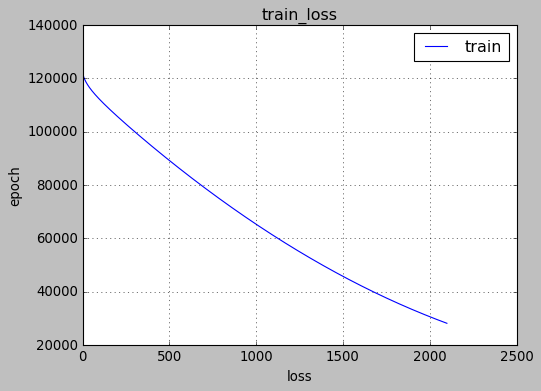

In [26]:
# Graphically display loss and accuracy
num_epochs = 2100
train_loss = hist.history['loss']
xc = range(num_epochs)

plt.figure(1, figsize = (7, 5))
plt.plot(xc, train_loss)
plt.xlabel('loss')
plt.ylabel('epoch')
plt.title('train_loss')
plt.grid(True)
plt.legend(['train', 'val'])
plt.style.use(['classic'])

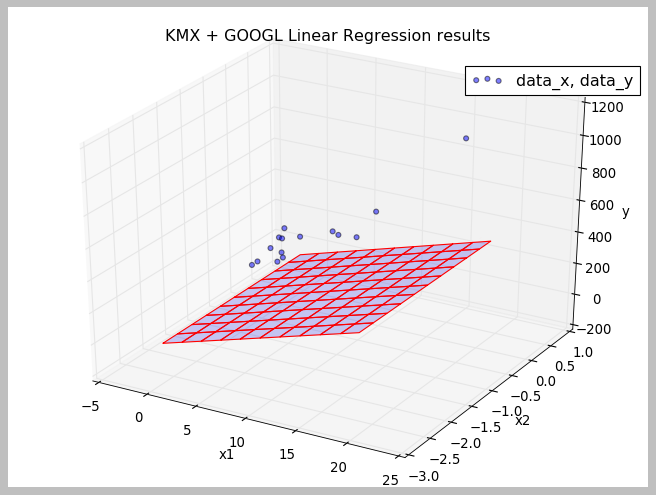

In [28]:
# Plot trained model.
x1_surface, x2_surface = np.meshgrid(np.linspace(data_x1_GOOGL.min(),data_x1_GOOGL.max(),100), np.linspace(data_x2_GOOGL.min(),data_x2_GOOGL.max(),100))
y_predicted_surface = x1_surface * w[0] + x2_surface * w[1] + b
figure = plt.figure()
ax = Axes3D(figure)
sct = ax.scatter(data_x1_GOOGL, data_x2_GOOGL, data_y_GOOGL, c = 'blue', marker = 'o', alpha = 0.5)
plt_surface = ax.plot_surface(x1_surface, x2_surface, y_predicted_surface, edgecolors='r', alpha = .2)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')
ax.set_title('KMX + GOOGL Linear Regression results')
plt.legend(['data_x, data_y'], bbox_to_anchor = (1, 0.8), loc = 4)
plt.show()